In [2]:
# Load dataset
import pandas as pd
file_path = "C:\\Users\\rajup\\Data_sets\\titanic.csv"
df = pd.read_csv(file_path)
print(df.shape)
print(df.columns)

(891, 21)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')


In [3]:
# Full preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

drop_col = ['WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class']
df = df.drop(columns=drop_col, axis=1)

# Checking for Null values
print(df.isna().sum())

# filling nan values in age with average
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Handling cabin null values
df['Cabin'] = df['Cabin'].notna().astype(int)

# Filling missing values in Embarked with most common value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Label encoding for sex and embarked columns
le_sex = LabelEncoder()
le_embarked= LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

# Features selection
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Pclass', 'Sex', 'Embarked']
features = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Sex', 'Embarked']

x = df[features]
y = df['Survived']

# Spliting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()

# make copy
x_train= x_train.copy()
x_test= x_test.copy()

x_train[num_features] = scaler.fit_transform(x_train[num_features])
x_test[num_features] = scaler.transform(x_test[num_features])

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Model training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


k = [1, 3, 5, 7, 9, 11]
Accuracy = []

def KNN(n):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score( y_test, y_pred)
    return accuracy

for i in k:
    score = KNN(i)
    Accuracy.append(score)

print(Accuracy)

[0.7094972067039106, 0.7988826815642458, 0.8044692737430168, 0.7877094972067039, 0.776536312849162, 0.776536312849162]


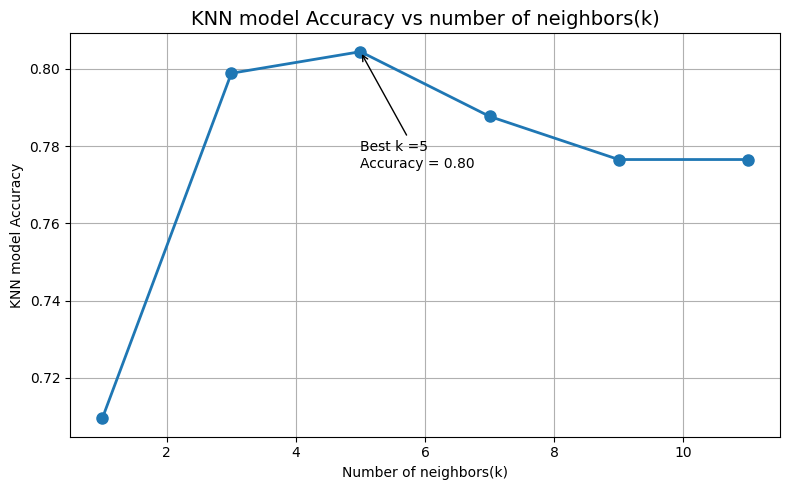

In [5]:
# Visual Analysis
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(k, Accuracy, marker='o', linestyle = '-', linewidth=2, markersize=8)

# Titles and Labels
plt.title("KNN model Accuracy vs number of neighbors(k)", fontsize = 14)
plt.xlabel("Number of neighbors(k)")
plt.ylabel("KNN model Accuracy")

# Add grid
plt.grid(True)

# Highlight best k
best_k =k[Accuracy.index(max(Accuracy))]
best_acc = max(Accuracy)
plt.annotate(f"Best k ={best_k}\nAccuracy = {best_acc:.2f}", xy = (best_k, best_acc), xytext=(best_k, best_acc-0.03),arrowprops=dict(arrowstyle="->"))
plt.tight_layout()
plt.show()

In [6]:
# Best k slection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
Best_k = k[Accuracy.index(max(Accuracy))]
model = KNeighborsClassifier(Best_k)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("Classification report :", classification_report(y_test, y_pred))
print("Confusion matrix :", confusion_matrix(y_test, y_pred))


Accuracy Score : 0.8044692737430168
Classification report :               precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       110
         1.0       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion matrix : [[95 15]
 [20 49]]
